### Dating classification with KNN algorithm.
Euclidean distance $ d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $

#### Classification

In [8]:
from numpy import *
import operator


def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(
        classCount.items(), key=operator.itemgetter(1), reverse=True
    )
    return sortedClassCount[0][0]

#### Read into matrix

In [9]:
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())  # get the number of lines in the file
    returnMat = zeros((numberOfLines, 3))  # prepare matrix to return
    classLabelVector = []  # prepare labels return
    fr = open(filename)  ### New heading
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split("\t")
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

#### Norming

In [10]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet / tile(ranges, (m, 1))  # element wise divide
    return normDataSet, ranges, minVals

## Dating test

In [11]:
def datingClassTest():
    hoRatio = 0.50  # hold out 50%
    datingDataMat, datingLabels = file2matrix(
        "datingTestSet2.txt"
    )  # load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(

            normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3
        )
        print("the classifier came back with: %d, the real answer is: %d" % (
            classifierResult,
            datingLabels[i],
        ))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))
    print(errorCount)


datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

## Plotting

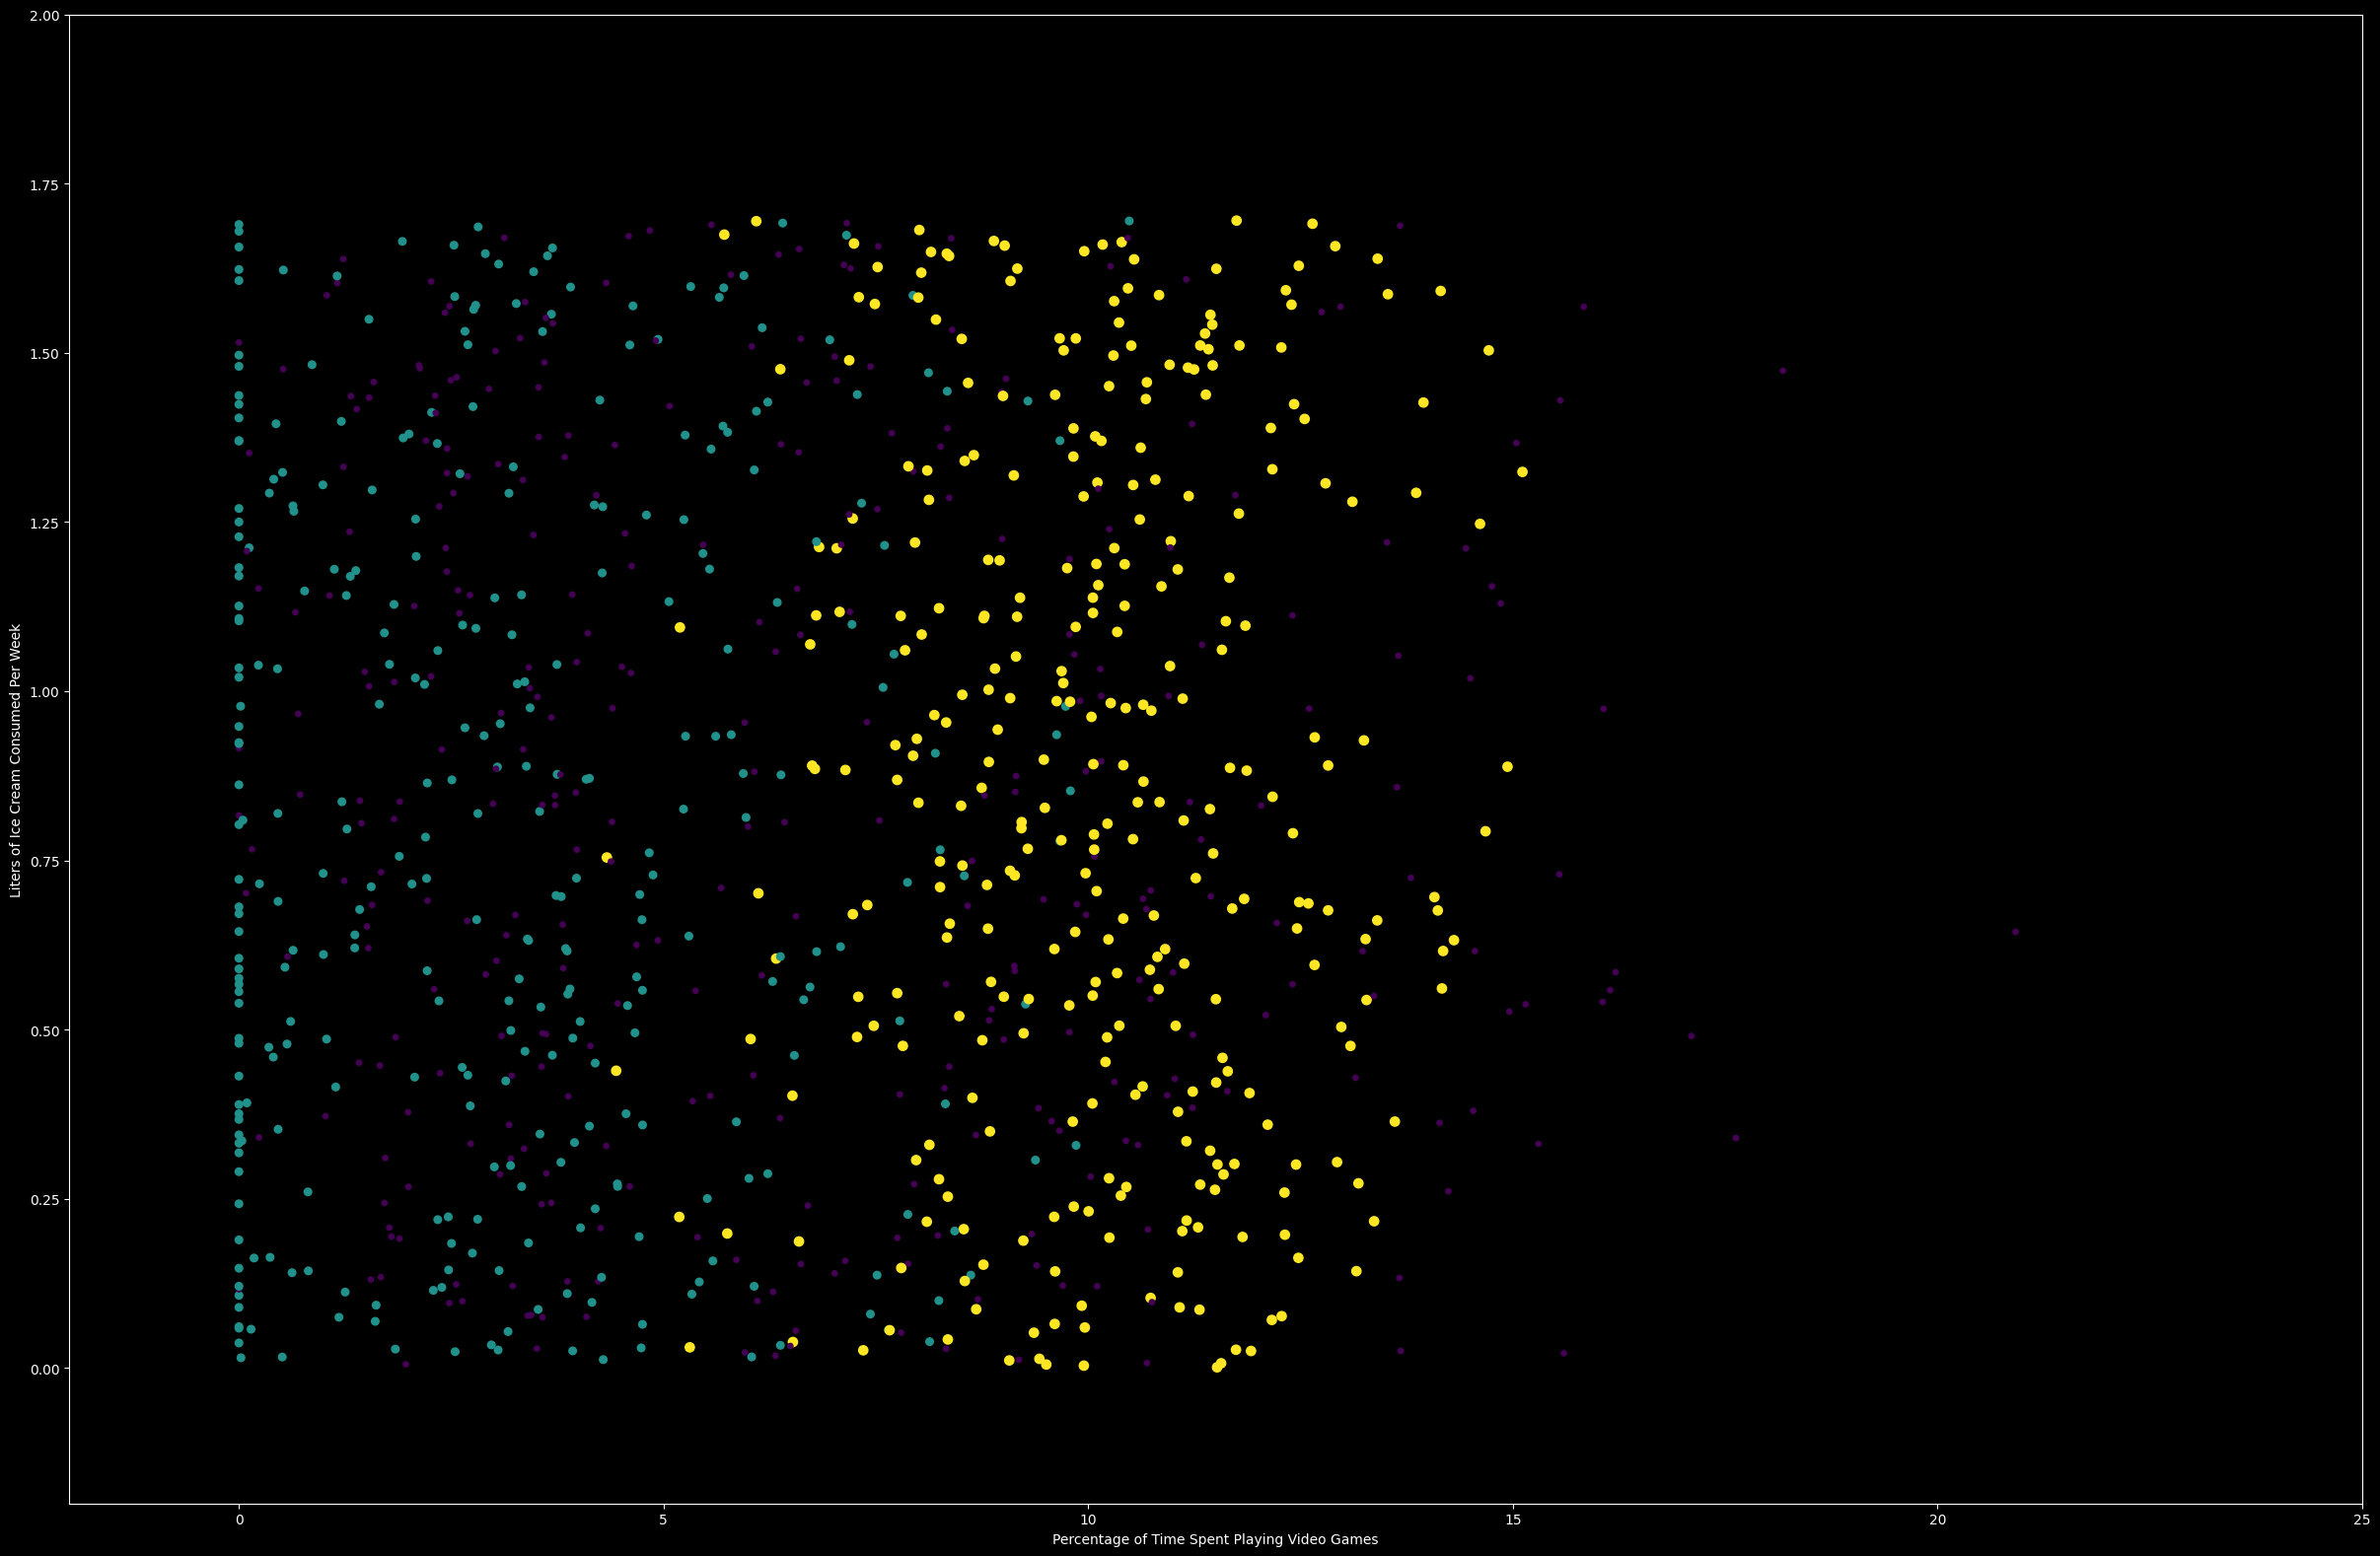

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.style.use(["dark_background"])  # dark background
plt.rcParams["figure.figsize"] = [30, 20]  # set the size of the plot
plt.rcParams[
    "figure.dpi"
] = 100  # dpi, doesn't really matter, but the higher the slower to render it
ax = fig.add_subplot(111)
datingDataMat, datingLabels = file2matrix(
    "datingTestSet2.txt"
)
ax.scatter(
    datingDataMat[:, 1],
    datingDataMat[:, 2],
    15.0 * array(datingLabels),
    15.0 * array(datingLabels),
)
ax.axis([-2, 25, -0.2, 2.0])
plt.xlabel("Percentage of Time Spent Playing Video Games")
plt.ylabel("Liters of Ice Cream Consumed Per Week")
plt.show()